# Support Vector Machine (GD Method)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

## Dataset

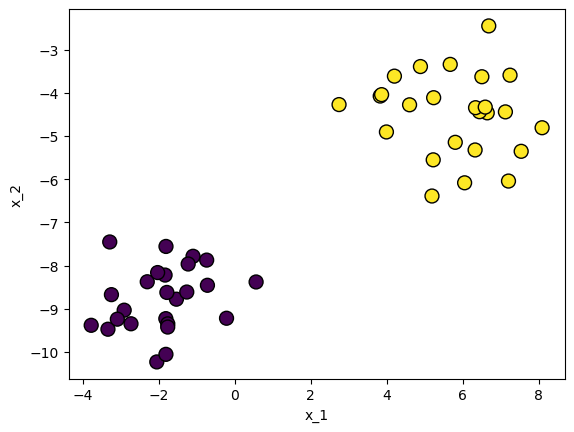

In [2]:
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

## Model


In [3]:
class SVM:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None  # 가중치 벡터
        self.bias = None  # 절편

    def fit(self, X, y):
        """
        SVM 모델 학습
        - X: 입력 데이터 (data 개수 x feature 개수)
        - y: 타겟 레이블 (data 개수만큼 -1 또는 1로 이루어진 배열)
        """
        n_samples, n_features = X.shape # n_samples: 데이터 개수

        # 레이블을 -1 또는 1로 변환
        y_modified = np.where(y <= 0, -1, 1)

        # Weight 및 bias 초기화
        self.weights = np.zeros(n_features)  # 가중치 벡터
        self.bias = 0  # 절편

        # 경사 하강법(Gradient Descent) 구현
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # 조건: y_i(W^T * x_i + b) >= 1 (마진 조건 확인)
                condition = y_modified[idx] * (np.dot(x_i, self.weights) + self.bias) >= 1

                if not condition:  # 마진 조건을 만족하지 않는 경우
                    # 힌지 손실 함수의 그래디언트를 계산하여 가중치 업데이트
                    # ∂L/∂W = y_i * x_i 에 따라 가중치 업데이트
                    self.weights += self.learning_rate * (y_modified[idx] * x_i)
                    # ∂L/∂b = y_i 에 따라 바이어스 업데이트
                    self.bias += self.learning_rate * (y_modified[idx])
                
                


    def predict(self, X):
        """
        새로운 데이터에 대한 클래스 예측
        - X: 입력 데이터
        - 반환값: 예측된 클래스 레이블 (-1 또는 1)
        """
        # 결정 함수: w^T * x + b
        linear_output = np.dot(X, self.weights) + self.bias
        # sign 함수로 -1 또는 1로 변환
        return np.sign(linear_output)


## Prediction

In [4]:
model = SVM()
margin_log = model.fit(X, y)

print(model.weights, model.bias)

[0.60413086 0.16688988] 0.058000000000000045


In [5]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

def visualize_svm(w, b):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    plt.xlabel("x_1")
    plt.ylabel("x_2")
    plt.show()

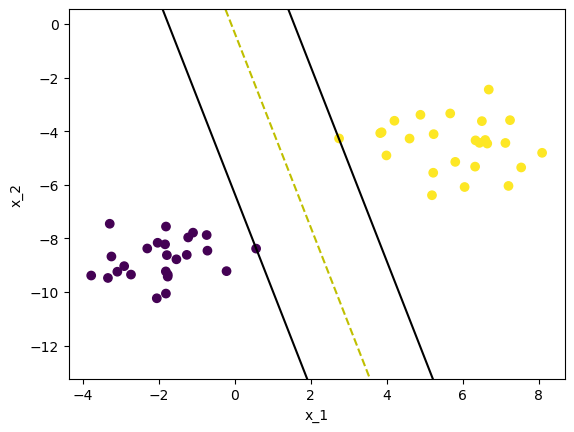

In [7]:
visualize_svm(model.weights, model.bias)

# QP: Quadratic Programming 기반으로 SVM 최적화를 수행하는 scikit-learn 라이브러리

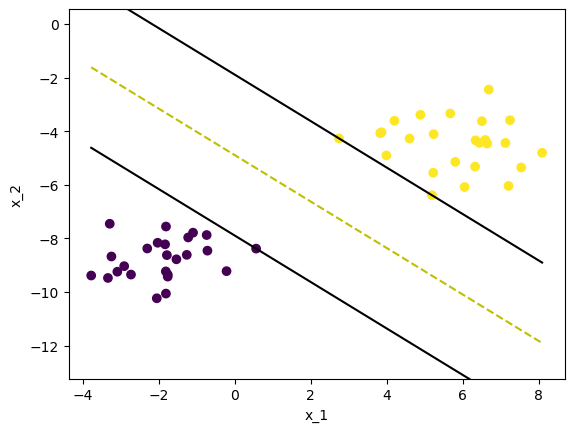

In [8]:
from sklearn.svm import SVC
# 선형 커널을 사용하는 SVM 모델 정의 및 학습
clf = SVC(kernel='linear') # kernel:linear,rbf,poly,sigmoid 등
clf.fit(X, y)

# 시각화 실행
visualize_svm(clf.coef_[0], clf.intercept_)

In [9]:
margin = 2 / np.sqrt(np.dot(clf.coef_[0].T, clf.coef_[0]))
print(margin)

4.5366449473146595
